In [1]:
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed

Using TensorFlow backend.


In [2]:
# load all images in a directory into memory
def load_images(path, dlmt, ulmt, size=(64, 64)):
    data_list = list()
    for filename in listdir(path):
        if int(filename.split('_')[0]) in range(dlmt, ulmt):
            pixels = load_img(path + filename, target_size=size)
            # convert to numpy array
            pixels = img_to_array(pixels)
            # store
            data_list.append(pixels)
    return asarray(data_list)

In [3]:
path = 'UTKFace/'
dataA = load_images(path, 65, 85)

In [4]:
dataB = load_images(path, 25, 35)

In [5]:
filename = 'Old2Young_64.npz'
savez_compressed(filename, dataA, dataB)
print('Saved dataset: ', filename)

Saved dataset:  Old2Young_64.npz


In [6]:
print('Loaded dataA: ', dataA.shape)
print('Loaded dataB: ', dataB.shape)

Loaded dataA:  (1522, 64, 64, 3)
Loaded dataB:  (7324, 64, 64, 3)


Loaded:  (1522, 64, 64, 3) (7324, 64, 64, 3)


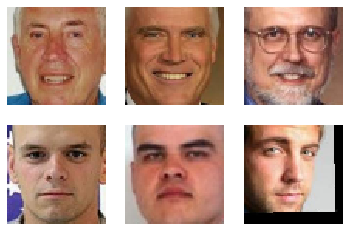

In [7]:
# load and plot the prepared dataset
from numpy import load
from matplotlib import pyplot
%matplotlib inline

# load the dataset
data = load('Old2Young_64.npz')
dataA, dataB = data['arr_0'], data['arr_1']
print('Loaded: ', dataA.shape, dataB.shape)
# plot source images
n_samples = 3
for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(dataA[i].astype('uint8'))
# plot target image
for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + n_samples + i)
    pyplot.axis('off')
    pyplot.imshow(dataB[i].astype('uint8'))
pyplot.show()